### Global Map Overview

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm
import numpy as np

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# white background
sns.set(style='white', context='notebook')


/var/folders/hj/_2__yt6s2vd0smglfwx30m0w0000gn/T/ipykernel_82744/2846796905.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


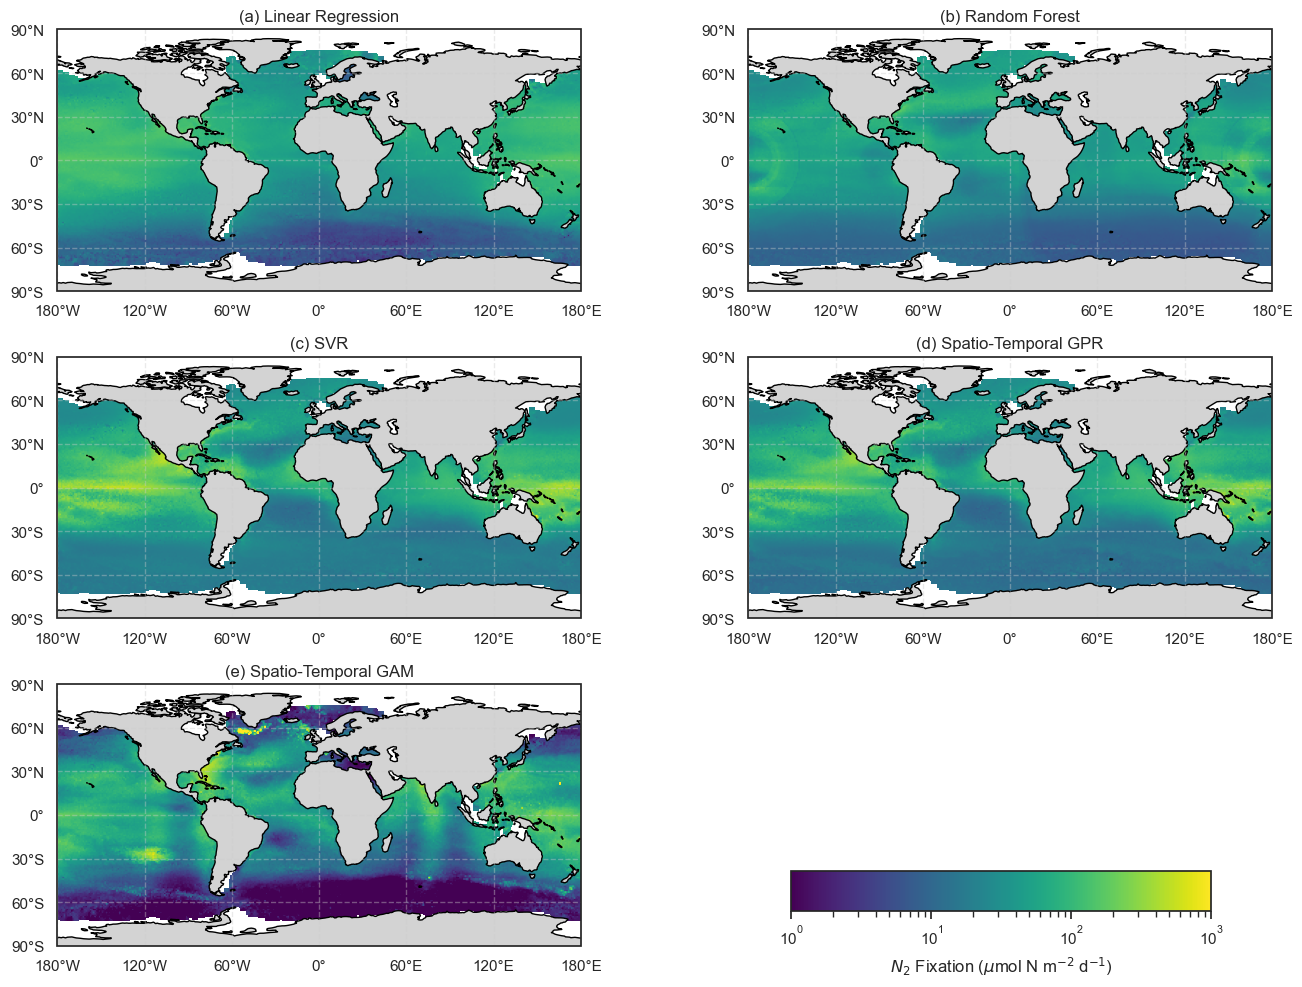

In [14]:
title = ['(a) Linear Regression', '(b) Random Forest', '(c) SVR', '(d) Spatio-Temporal GPR', '(e) Spatio-Temporal GAM']
data_file = ['annual_lr.npz', 'annual_rf.npz', 'annual_svr.npz', 'annual_gpr.npz', 'annual_gam.npz']

fig, axes = plt.subplots(3, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()


# 5 subplot, 3 rows 2 columns
for i in range(len(title)):
    ax = axes[i]
    
    data = np.load(data_file[i])
    lat = data['lat']
    lon = data['lon']
    annual_filled = data['n2fix']
    
    img = ax.imshow(
        annual_filled,
        origin='lower',
        cmap='viridis',
        extent=[lon.min(), lon.max(), lat.min(), lat.max()],
        transform=ccrs.PlateCarree(),
        norm=LogNorm(vmin=1, vmax=1000)
    )
    
    # land and boundary
    ax.coastlines(resolution='110m', linewidth=1)
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
    
    # label
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

    ax.set_xticklabels(['180°W','120°W','60°W','0°','60°E','120°E','180°E'])
    ax.set_yticklabels(['90°S','60°S','30°S','0°','30°N','60°N','90°N'])

    ax.gridlines(draw_labels=False, linestyle='--', alpha=0.4)

    #each subplot a title
    ax.set_title(title[i])

fig.delaxes(axes[-1])

# One total color bar
cbar_ax = fig.add_axes([0.6, 0.08, 0.3, 0.04])  # [left, bottom, width, height]
cbar = fig.colorbar(img, cax=cbar_ax, orientation='horizontal', ticks=[1, 10, 100, 1000])
cbar.set_label('$N_2$ Fixation ($\mu$mol N m$^{-2}$ d$^{-1}$)', labelpad=5)

plt.tight_layout()  
plt.savefig("general_map.png", dpi=300)
plt.show()
    